In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)


X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

test_ds = test_ds.batch(8)

c:\Projekty\kodilla\modul_18\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 300)            │       300,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,138,510 (4.34 MB)

 Trainable params: 1,138,510 (4.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7711 - loss: 0.6199 - learning_rate: 0.0010
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8549 - loss: 0.3900 - learning_rate: 0.0010
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8792 - loss: 0.3266 - learning_rate: 8.0000e-04
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8871 - loss: 0.3068 - learning_rate: 8.0000e-04
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9027 - loss: 0.2627 - learning_rate: 5.1200e-04
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9091 - loss: 0.2424 - learning_rate: 5.1200e-04
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9207 - loss: 0.2073 - learning_rate: 2.6214e-04
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9272 - loss: 0.1895 - learning_rate: 2.6214e-04
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.936

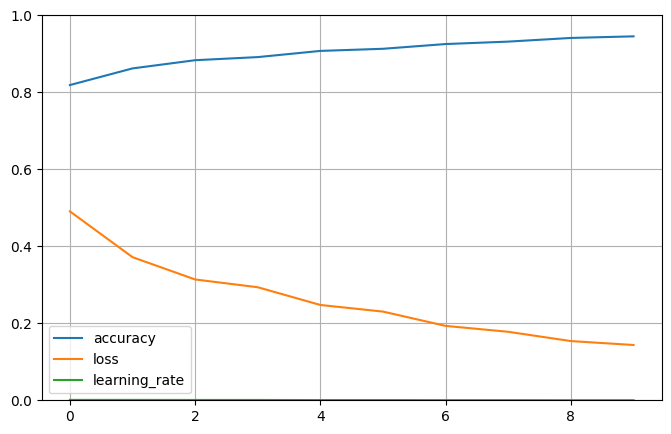

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

def polynomial_decay_fn(epoch, current_lr):
    decay_rate = 0.8
    decay_step = 2
    if epoch % decay_step == 0 and epoch != 0:
        return current_lr * decay_rate**(epoch/decay_step)
    return current_lr

f_mnist_model = Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    Flatten(input_shape=(28, 28)),

    Dense(1000, activation='mish'),
    Dense(300, activation='mish'),
    Dense(150, activation='relu'),
    Dense(50, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    Dense(10, activation='softmax')
])

f_mnist_model.summary()

initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate=initial_learning_rate,
#     decay_steps=20 * 1000,
#     alpha=1e-2
# )
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

f_mnist_model.compile(
  optimizer=optimizer,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

train_stats = f_mnist_model.fit(
  train_ds, # bo to dataset
  verbose=1,
  epochs=10,
  callbacks=[
    # ReduceLROnPlateau(monitor='val_loss',mode='auto', factor=0.1, patience=3, min_lr=1e-6, verbose=1),
    # tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8, restore_best_weights=True)
    tf.keras.callbacks.LearningRateScheduler(polynomial_decay_fn)
  ]
  # validation_split=0.1
  # validation_data=(X_test, y_test)
)


pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
f_mnist_model.save('f_mnist_model.h5')

In [71]:
new_model = tf.keras.models.load_model('f_mnist_model.h5')
new_model.compile(
  optimizer=optimizer,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)
new_model.evaluate(test_ds)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9057 - loss: 0.2969


[0.31693050265312195, 0.9039999842643738]